In [2]:
!pip install lifetimes

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47994 sha256=5ee0eeedd97df12bef0fa84c3325ece4814e60ae1b292a71e231169dec5e3ddd
  Stored in directory: c:\users\vinay\appdata\local\pip\cache\wheels\85\f5\d2\3ef47d3a836b17620bf41647222825b065245862d12aa62885
Successfully built autograd


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lifetimes

#Let's make this notebook reproducible 
np.random.seed(42)

import random
random.seed(42)

import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_excel('Desktop/customer_retention_dataset.xlsx')
data

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [18]:
data.sample(10)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
30,Female,Less than 20 years,Bangalore,560010,Above 4 years,Less than 10 times,Mobile internet,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
116,Female,21-30 years,Bangalore,560037,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
79,Female,31-40 years,Karnal,132036,Less than 1 year,31-40 times,Mobile internet,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
127,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
190,Male,41-50 yaers,Delhi,110044,2-3 years,Less than 10 times,Mobile internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
137,Male,31-40 years,Moradabad,244001,Above 4 years,21-30 times,Mobile Internet,Laptop,Others,Window/windows Mobile,...,"Amazon.in, Paytm.com","Amazon.in, Flipkart.com",Flipkart.com,"Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com","Paytm.com, Snapdeal.com",Amazon.in,"Flipkart.com, Snapdeal.com","Amazon.in, Paytm.com",Amazon.in
202,Female,31-40 years,Solan,173212,3-4 years,Less than 10 times,Mobile Internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
45,Female,41-50 yaers,Bangalore,560037,Above 4 years,41 times and above,Mobile internet,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
173,Female,21-30 years,Bangalore,560002,Above 4 years,Less than 10 times,Mobile internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
239,Male,31-40 years,Noida,201310,3-4 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Paytm.com,"Amazon.in, Flipkart.com",Paytm.com,Paytm.com,Snapdeal.com,Snapdeal.com,Myntra.com,Myntra.com,Flipkart.com,Flipkart.com


In [19]:
data.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

<AxesSubplot:>

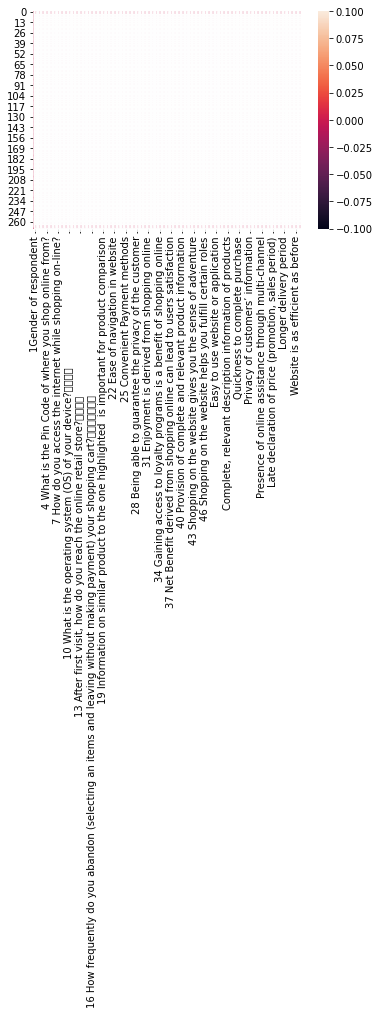

In [20]:
# checking null value using heatmap

sns.heatmap(data.isnull(),annot=True)

Checking for an outlier in the dataset

using z-score to identify the outliers.
ideal range for z-score is +-3, anything below or above 3 or -3 is an outlier
we can use boxplot to check for outliers as well

<AxesSubplot:>

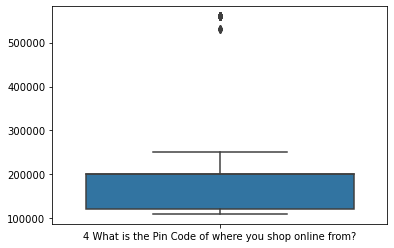

In [21]:
sns.boxplot(data=data)

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?'>

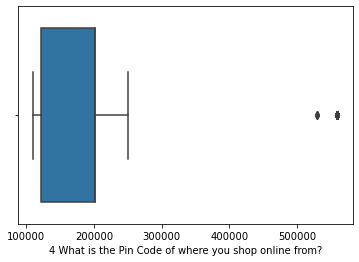

In [22]:
sns.boxplot(data=data,x=data['4 What is the Pin Code of where you shop online from?'])

In [24]:
data.info


<bound method DataFrame.info of     1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                

In [25]:
data.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='Density'>

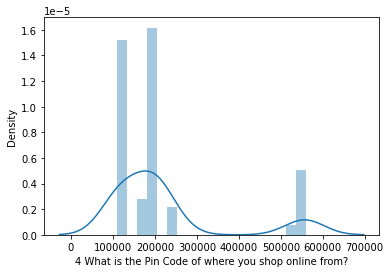

In [26]:
sns.distplot(data['4 What is the Pin Code of where you shop online from?'])

In [27]:
data.corr()

,4 What is the Pin Code of where you shop online from?
4 What is the Pin Code of where you shop online from?,1.0
